<br>
<p style = "font-size:32px; font-family:Garamond ; font-weight : normal; background-color:maroon; color :  #fed766 ; text-align: center; border-radius: 5px 5px; padding: 5px"> 😍😍😍 Thanks for visiting Our notebook 😍😍😍</p> 


<br>
<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color:maroon; color :  #fed766 ; text-align: center; border-radius: 5px 5px; padding: 5px"> Skin Diseases Classification using Deep Convolutional Neural Networks </h2> 
<br>
<div class = 'image'> <img style="float:center; width:50%; hight:50%; border:5px solid #fed049;" align=center; src = https://media.glamour.com/photos/5d4940ff77204b00087470ab/1:1/w_1800,h_1800,c_limit/0805_eczema_river.gif> 
</div>
<br>
<br>


<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: maroon; color : #fed766; border-radius: 5px 5px; padding: 5px;text-align:center; font-weight: bold" >Table of Contents</h2> 

* [1. Introduction](#1.0)
    * [1.1 Libraries and Utilies](#1.1)
    * [1.2 Function to Print in Colors](#1.2)
    * [1.3 Function to Show Sample Images From Dataset](#1.3)
    * [1.4 Custom Callback](#1.4)
    * [1.5 Function to Split The Dataset](#1.5)
    * [1.6 Function to Under Sampling](#1.6)
    * [1.7 Function to Balacne Classes with Augmented Images](#1.7)
    * [1.8 Function to Calculate Wrong Predicted Images in Each Class and Show Confusion Matrix and Classification Report](#1.8)
    * [1.8 Function to Plot Training and Validation Data with Best Epoch](#1.9)
 
* [2. Preprocessing Dataset](#2.0)
    * [2.1 Splitting](#2.1)
    * [2.2 Pick the Optimal Image Size for Training](#2.2)
    * [2.3 Plots Before Balancing](#2.3)
    * [2.4 Under Sampling and Balancing](#2.4)
    * [2.5 Plots After Balancing](#2.5)
    * [2.6 Under Sampling Test DF](#2.6)
    * [2.7 Creation of Generators](#2.7)

* [3. Modeling](#3.0)
    * [3.1 Base Model](#3.1)
    * [3.2 Layers](#3.2)
    * [3.3 Callback and Fitting](#3.3)
    * [3.4 Plotting Error,Losses,and Accuracies](#3.4)
    * [3.5 Show Confusion Matrix and Classification Report](#3.5)
    * [3.6 Convert Model to TFlite](#3.6)
    * [3.7 Download The Model](#3.7)
  
* [4. Summary](#4)



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal;background-color: maroon; color : #fed766; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" >1. Introduction</h2>
<br>

<div class = 'image'> <img style="float:center; width:50%; hight:50%; border:5px solid maroon;" align=center src = https://img.freepik.com/free-vector/hand-drawn-flat-design-melanoma-infographic_23-2149387735.jpg?w=2000>
</div>
<br>
Skin diseases have been increasing among men and women worldwide for many decades.The skin, the body's biggest organ, serves as an important barrier. The skin's principal functions are to protect the body from harmful chemicals in the environment and to prevent the body's various nutrients from leaking out. Many elements influence skin health in human productive life, including UV rays, smoking, drinking, exercise, infections, and the employment environment. Skin problems are currently among the most common ailments afflicting people. A third to seventy percent of the population is classified as high-risk. Every year, 5.4 million new cases of skin cancer are reported in the United States, according to the British Skin Foundation Report from 2018. One in every five Americans will be diagnosed with cutaneous cancer during their lifetime. Skin disorders have a significant negative impact on people's daily lives, interpersonal interactions, internal organs, and even survival. This illness, as a mental ailment, has the potential to induce solitude, despair, and even suicide. As a result, skin disease has emerged as one of the most pressing issues in medicine. According to recent research, skin problems impact millions of individuals globally and cause significant illnesses. Skin disease prevalence has progressively increased throughout the years, with some illnesses being more widespread than others. 

<br>



<a id = '1.1'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.1. Loading Libraries and Util...</strong></p>

In [11]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

/tmp/ipykernel_32/586825512.py:24: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<a id = '1.2'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.2. Function to Print in colors...</strong></p>

In [12]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

<a id = '1.3'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.3. Function to Show Sample Images from Dataset...</strong></p>

In [13]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=10)
        plt.axis('off')
    plt.show()

<a id = '1.4'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>1.4. Custom CallBack...</strong></p>

In [14]:
class LRA(keras.callbacks.Callback):
    def __init__(self,model, base_model, patience,stop_patience, threshold, factor, dwell, batches, initial_epoch,epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.base_model=base_model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.batches=batches # number of training batch to runn per epoch
        self.initial_epoch=initial_epoch
        self.epochs=epochs
        self.ask_epoch=ask_epoch
        self.ask_epoch_initial=ask_epoch # save this value to restore if restarting training
        # callback variables 
        self.count=0 # how many times lr has been reduced without improvement
        self.stop_count=0        
        self.best_epoch=1   # epoch with the lowest loss        
        self.initial_lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it         
        self.highest_tracc=0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss=np.inf # set lowest validation loss to infinity initially
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights=self.model.get_weights()   # save initial weights if they have to get restored 
        
    def on_train_begin(self, logs=None):        
        if self.base_model != None:
            status=base_model.trainable
            if status:
                msg=' initializing callback starting train with base_model trainable'
            else:
                msg='initializing callback starting training with base_model not trainable'
        else:
            msg='initialing callback and starting training'                        
        print_in_color (msg, (244, 252, 3), (55,65,80)) 
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print_in_color(msg, (244,252,3), (55,65,80)) 
        self.start_time= time.time()
        
    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time            
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        msg=f'Training is completed - model is set with weights from epoch {self.best_epoch} '
        print_in_color(msg, (0,255,0), (55,65,80))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color(msg, (0,255,0), (55,65,80))   
        
    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy 
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count        
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now 
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy 
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')        
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (acc-self.highest_tracc )*100/self.highest_tracc
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                self.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.best_epoch=epoch + 1  # set the value of best epoch for this epoch              
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1: # lr should be adjusted
                    color=(245, 170, 66)
                    lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count=0 # reset counter
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (self.lowest_vloss- v_loss )*100/self.lowest_vloss
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                self.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)                
                self.best_epoch=epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count>=self.patience-1: # need to adjust lr
                    color=(245, 170, 66)
                    lr=lr * self.factor # adjust the learning rate                    
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,255), (55,65,80))
            self.model.stop_training = True # stop training
        else: 
            if self.ask_epoch !=None:
                if epoch + 1 >= self.ask_epoch:
                    if base_model.trainable:
                        msg='enter H to halt  or an integer for number of epochs to run then ask again'
                    else:
                        msg='enter H to halt ,F to fine tune model, or an integer for number of epochs to run then ask again'
                    print_in_color(msg, (0,255,255), (55,65,80))
                    ans=input('')
                    if ans=='H' or ans=='h':
                        msg=f'training has been halted at epoch {epoch + 1} due to user input'
                        print_in_color(msg, (0,255,255), (55,65,80))
                        self.model.stop_training = True # stop training
                    elif ans == 'F' or ans=='f':
                        if base_model.trainable:
                            msg='base_model is already set as trainable'
                        else:
                            msg='setting base_model as trainable for fine tuning of model'
                            self.base_model.trainable=True
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))                         
                        self.count=0
                        self.stop_count=0                        
                        self.ask_epoch = epoch + 1 + self.ask_epoch_initial 
                        
                    else:
                        ans=int(ans)
                        self.ask_epoch +=ans
                        msg=f' training will continue until epoch ' + str(self.ask_epoch)                         
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80)) 

<a id = '1.5'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>1.5. Function to Split The Dataset...</strong></p>

In [15]:
def preprocess (sdir, trsplit, vsplit):
    filepaths=[]
    labels=[]    
    classlist=os.listdir(sdir)
    for klass in classlist:
        classpath=os.path.join(sdir,klass)
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    df=pd.concat([Fseries, Lseries], axis=1)       
    # split df into train_df and test_df 
    dsplit=vsplit/(1-trsplit)
    strat=df['labels']    
    train_df, dummy_df=train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)
    strat=dummy_df['labels']
    valid_df, test_df=train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)
    print('train_df length: ', len(train_df), '  test_df length: ',len(test_df), '  valid_df length: ', len(valid_df))
    print(train_df['labels'].value_counts())
    return train_df, test_df, valid_df

<a id = '1.6'></a>

<p style = "font-size:25px; color : #fed766; background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>1.6. Under Sampling...</strong></p>

In [16]:
def trim(df, max_size, min_size, column):
    df=df.copy()
    sample_list=[] 
    groups=df.groupby(column)
    for label in df[column].unique():        
        group=groups.get_group(label)
        sample_count=len(group)         
        if sample_count> max_size :
            samples=group.sample(max_size, replace=False, weights=None, random_state=123, axis=0).reset_index(drop=True)
            sample_list.append(samples)
        elif sample_count>= min_size:
            sample_list.append(group)
    df=pd.concat(sample_list, axis=0).reset_index(drop=True)
    balance=list(df[column].value_counts())
    print (balance)
    return df

<a id = '1.7'></a>
<p style = "font-size:25px;color : #fed766;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.7. Balance Classes of DataSset With Augmented Images...</strong></p>

In [17]:
def balance(train_df,max_samples, min_samples, column, working_dir, image_size):
    train_df=train_df.copy()
    train_df=trim(train_df, max_samples, min_samples, column)    
    # make directories to store augmented images
    aug_dir=os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in train_df['labels'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path)
    # create and store the augmented images     
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
    groups=train_df.groupby('labels') # group by class
    for label in train_df['labels'].unique():  # for every class        
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< max_samples: # if the class has less than target number of images
            aug_img_count=0
            delta=max_samples-sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images    
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=image_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)            
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=os.listdir(aug_dir)
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)     
        flist=os.listdir(classpath)    
        for f in flist:        
            fpath=os.path.join(classpath,f)         
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')
    aug_df=pd.concat([Fseries, Lseries], axis=1)    
    ndf=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
    print (list(ndf['labels'].value_counts()) )
    return ndf 

<a id = '1.8'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.8. Function to Calculate The Wrong Predicted Images in Each class and To Show Confusion Matrix ...</strong></p>

In [18]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

<a id = '1.9'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 1.9. Function To Plot Training and Validation Data with Best Epoch ...</strong></p>

In [19]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()


<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: maroon; color : #fed766; border-radius: 5px 5px; padding:5px; text-align:center; font-weight: bold" >2. Preprocessing Dataset</h2>

<a id = '2.1'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.1. Splitting ...</strong></p>

In [20]:
sdir=r'/kaggle/input/final-skin-diseases/Final Skin Diseases/Skin Diseases'
train_df, test_df, valid_df= preprocess(sdir, .8,.1)

train_df length:  22728   test_df length:  2842   valid_df length:  2841
Melanocytic Nevi                                          6376
Basal Cell Carcinoma                                      2658
Melanoma                                                  2512
Warts Molluscum and other Viral Infections                1682
Benign Keratosis-like Lesions                             1663
Psoriasis pictures Lichen Planus and related diseases     1644
Seborrheic Keratoses and other Benign Tumors              1477
Tinea Ringworm Candidiasis and other Fungal Infections    1362
Eczema                                                    1342
Atopic Dermatitis                                         1006
Normal Skin                                               1006
Name: labels, dtype: int64


<a id = '2.2'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.2. Pick the Optimal Image Size for Training Convolution Neural Network...</strong></p>

In [21]:
!pip install imagesize

In [22]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

# Get the Image Resolutions
imgs = [img.name for img in Path('/kaggle/input/final-skin-diseases/Final Skin Diseases/Skin Diseases/Eczema/').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get('/kaggle/input/final-skin-diseases/Final Skin Diseases/Skin Diseases/Eczema/'+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()
img_meta_df.to_csv('/kaggle/working/out1.csv')  


Total Nr of Images in the dataset: 1677


/tmp/ipykernel_32/3088985890.py:17: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)


Text(0, 0.5, 'Height')

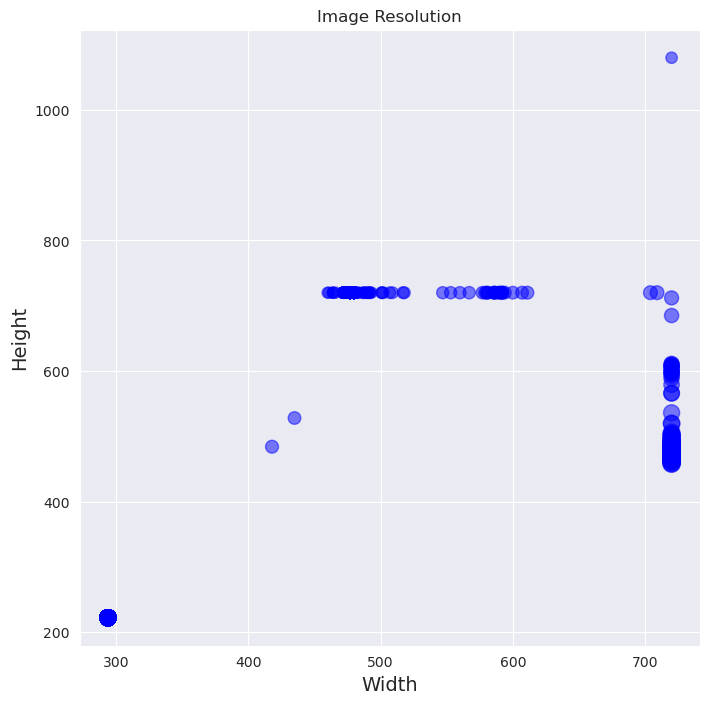

In [23]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

<a id = '2.3'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.3. Plots Before Balancing ...</strong></p>

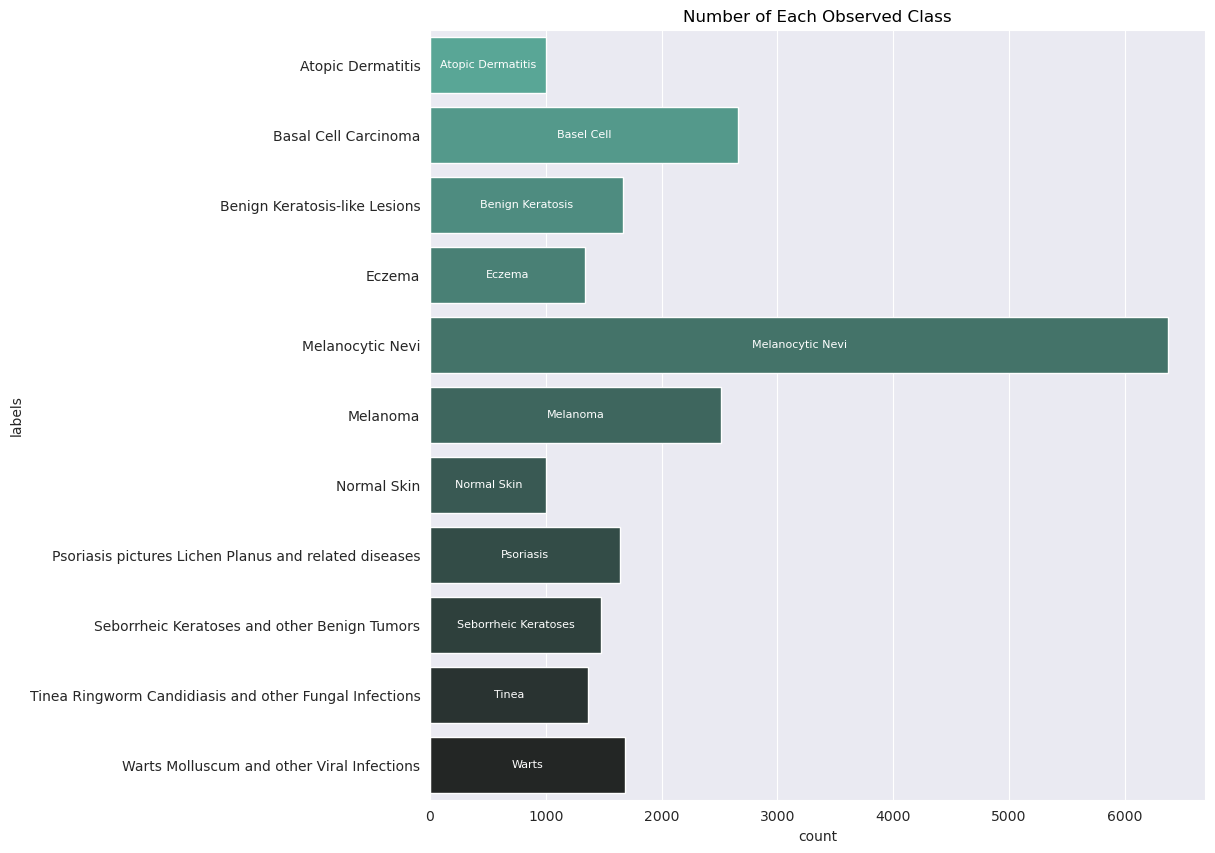

In [24]:
plt.figure(figsize=(10,10))
splot = sns.countplot(data = train_df.sort_values(by='labels'), y ='labels', palette='dark:#5A9_r', saturation=0.9)
plt.bar_label(container=splot.containers[0], 
              labels=['Atopic Dermatitis','Basel Cell', 'Benign Keratosis', 'Eczema','Melanocytic Nevi','Melanoma','Normal Skin','Psoriasis','Seborrheic Keratoses','Tinea','Warts'], 
              label_type='center', size=8, color='w')
plt.title('Number of Each Observed Class',color="black")
plt.show()


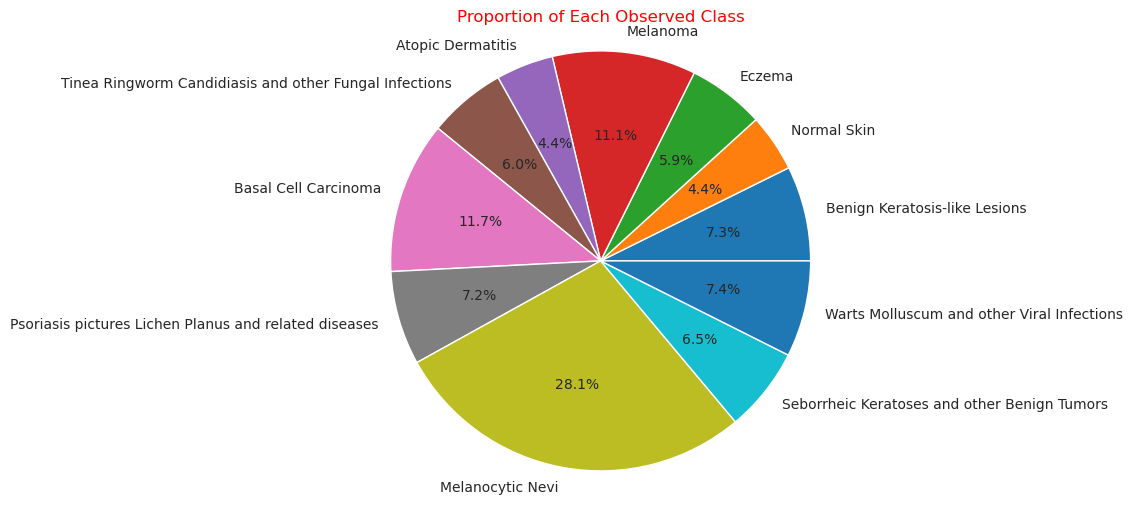

In [25]:
## count number of images in each class for training data
DF = pd.DataFrame(columns=['Label','Count'])
DF['Label']=pd.Series([os.listdir(sdir)[x] for x in range(0,11)])
DF['Count']=pd.Series([len(os.listdir(os.path.join(sdir,os.listdir(sdir)[x]))) for x in range(0,11)])
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(DF['Count'],
        labels=DF['Label'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Each Observed Class',color="Red")
plt.show()

<a id = '2.4'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.4. Balancing ...</strong></p>

In [26]:
max_samples= 2012
min_samples=0
column='labels'
working_dir = r'./'
img_size=(300, 300)
ndf=balance(train_df,max_samples, min_samples, column, working_dir, img_size)

[2012, 2012, 2012, 1682, 1663, 1644, 1477, 1362, 1342, 1006, 1006]
Found 1006 validated image filenames.
Found 1477 validated image filenames.
Found 1362 validated image filenames.
Found 1682 validated image filenames.
Found 1663 validated image filenames.
Found 1006 validated image filenames.
Found 1342 validated image filenames.
Found 1644 validated image filenames.
[2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012]


<a id = '2.5'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.5. Plots After Balancing ...</strong></p>

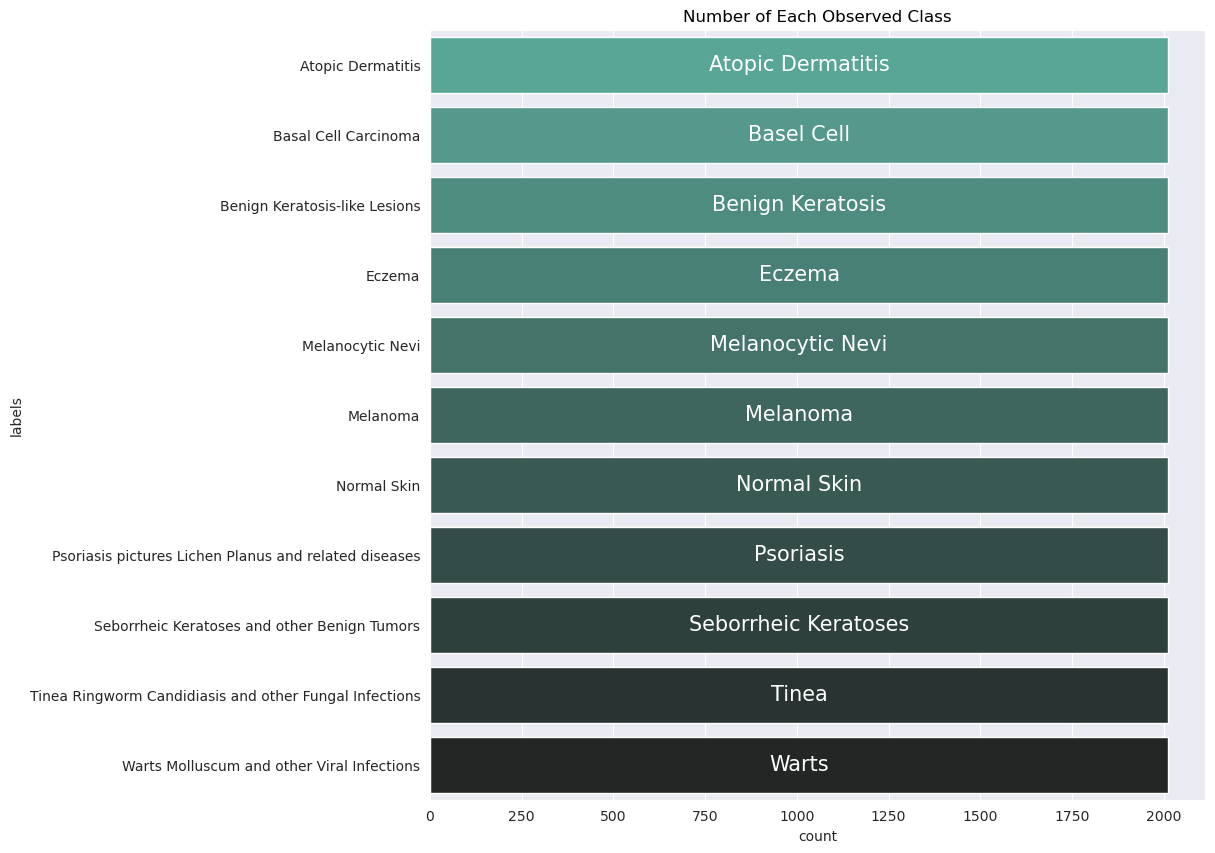

In [27]:
plt.figure(figsize=(10,10))
splot = sns.countplot(data = ndf.sort_values(by='labels'), y ='labels', palette='dark:#5A9_r', saturation=0.9)
plt.bar_label(container=splot.containers[0], 
              labels=['Atopic Dermatitis','Basel Cell', 'Benign Keratosis', 'Eczema','Melanocytic Nevi','Melanoma','Normal Skin','Psoriasis','Seborrheic Keratoses','Tinea','Warts'], 
              label_type='center', size=15, color='w')
plt.title('Number of Each Observed Class',color="black")
plt.show()

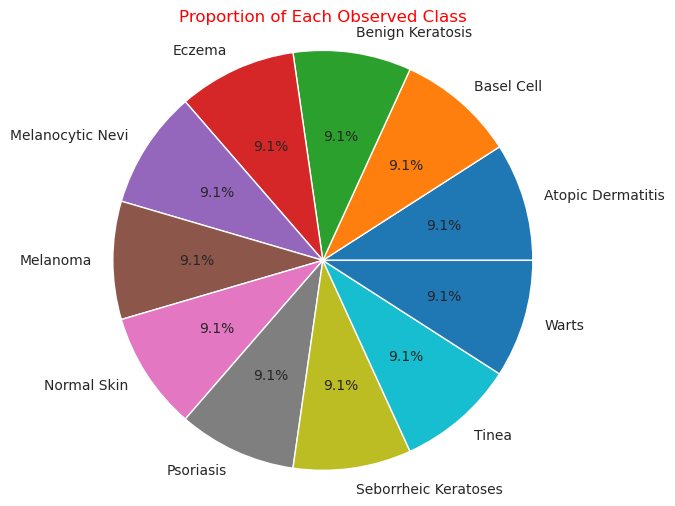

In [28]:
ADF = pd.DataFrame(columns=['Label','Count'])
labels=['Atopic Dermatitis','Basel Cell', 'Benign Keratosis', 'Eczema','Melanocytic Nevi','Melanoma','Normal Skin','Psoriasis','Seborrheic Keratoses','Tinea','Warts'] 
count = [2012,2012,2012, 2012,2012,2012,2012,2012,2012,2012,2012]
ADF['Label']= labels
ADF['Count']= count
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(ADF['Count'],
        labels=ADF['Label'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Each Observed Class',color="Red")
plt.show()

In [29]:
## count number of images in each class for training data
item_counts = ndf["labels"].value_counts()
print(item_counts)


Atopic Dermatitis                                         2012
Basal Cell Carcinoma                                      2012
Seborrheic Keratoses and other Benign Tumors              2012
Melanoma                                                  2012
Tinea Ringworm Candidiasis and other Fungal Infections    2012
Melanocytic Nevi                                          2012
Warts Molluscum and other Viral Infections                2012
Benign Keratosis-like Lesions                             2012
Normal Skin                                               2012
Eczema                                                    2012
Psoriasis pictures Lichen Planus and related diseases     2012
Name: labels, dtype: int64


<a id = '2.6'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.6. Under Sampling Test Dataframe to 125 Image for each Class...</strong></p>

In [30]:
test_df

filepaths  \
27116  /kaggle/input/final-skin-diseases/Final Skin D...   
24569  /kaggle/input/final-skin-diseases/Final Skin D...   
12623  /kaggle/input/final-skin-diseases/Final Skin D...   
17148  /kaggle/input/final-skin-diseases/Final Skin D...   
25950  /kaggle/input/final-skin-diseases/Final Skin D...   
...                                                  ...   
12193  /kaggle/input/final-skin-diseases/Final Skin D...   
11502  /kaggle/input/final-skin-diseases/Final Skin D...   
22363  /kaggle/input/final-skin-diseases/Final Skin D...   
1521   /kaggle/input/final-skin-diseases/Final Skin D...   
14370  /kaggle/input/final-skin-diseases/Final Skin D...   

                                             labels  
27116    Warts Molluscum and other Viral Infections  
24569  Seborrheic Keratoses and other Benign Tumors  
12623                          Basal Cell Carcinoma  
17148                              Melanocytic Nevi  
25950  Seborrheic Keratoses and other Benign Tumors  
...                                             ...  
12193                          Basal Cell Carcinoma  
11502                          Basal Cell Carcinoma  
22363                              Melanocytic Nevi  
1521                  Benign Keratosis-like Lesions  
14370                          Basal Cell Carcinoma  

[2842 rows x 2 columns]

In [31]:
test_bdf=trim(test_df,125,0,column)


[125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125]


In [32]:
## count number of images in each class for training data
item_counts = test_bdf["labels"].value_counts()
print(item_counts)


Warts Molluscum and other Viral Infections                125
Seborrheic Keratoses and other Benign Tumors              125
Basal Cell Carcinoma                                      125
Melanocytic Nevi                                          125
Melanoma                                                  125
Eczema                                                    125
Psoriasis pictures Lichen Planus and related diseases     125
Normal Skin                                               125
Atopic Dermatitis                                         125
Tinea Ringworm Candidiasis and other Fungal Infections    125
Benign Keratosis-like Lesions                             125
Name: labels, dtype: int64


<a id = '2.7'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 2.7. Creation of Generators ...</strong></p>

In [33]:
channels=3
batch_size=32
img_shape=(img_size[0], img_size[1], channels)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
trgen=ImageDataGenerator(rescale = 1.0/255. , horizontal_flip=True )
tvgen=ImageDataGenerator(rescale = 1.0/255.)
train_gen=trgen.flow_from_dataframe(ndf, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=tvgen.flow_from_dataframe(test_bdf, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
ubtest_gen=tvgen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=tvgen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_gen.labels)/batch_size))
val_steps=int(np.ceil(len(valid_gen.labels)/batch_size))


test batch size:  58   test steps:  49
Found 22132 validated image filenames belonging to 11 classes.
Found 1375 validated image filenames belonging to 11 classes.
Found 2842 validated image filenames belonging to 11 classes.
Found 2841 validated image filenames belonging to 11 classes.


In [34]:
test_gen.class_indices

{'Atopic Dermatitis': 0,
 'Basal Cell Carcinoma': 1,
 'Benign Keratosis-like Lesions': 2,
 'Eczema': 3,
 'Melanocytic Nevi': 4,
 'Melanoma': 5,
 'Normal Skin': 6,
 'Psoriasis pictures Lichen Planus and related diseases': 7,
 'Seborrheic Keratoses and other Benign Tumors': 8,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 9,
 'Warts Molluscum and other Viral Infections': 10}

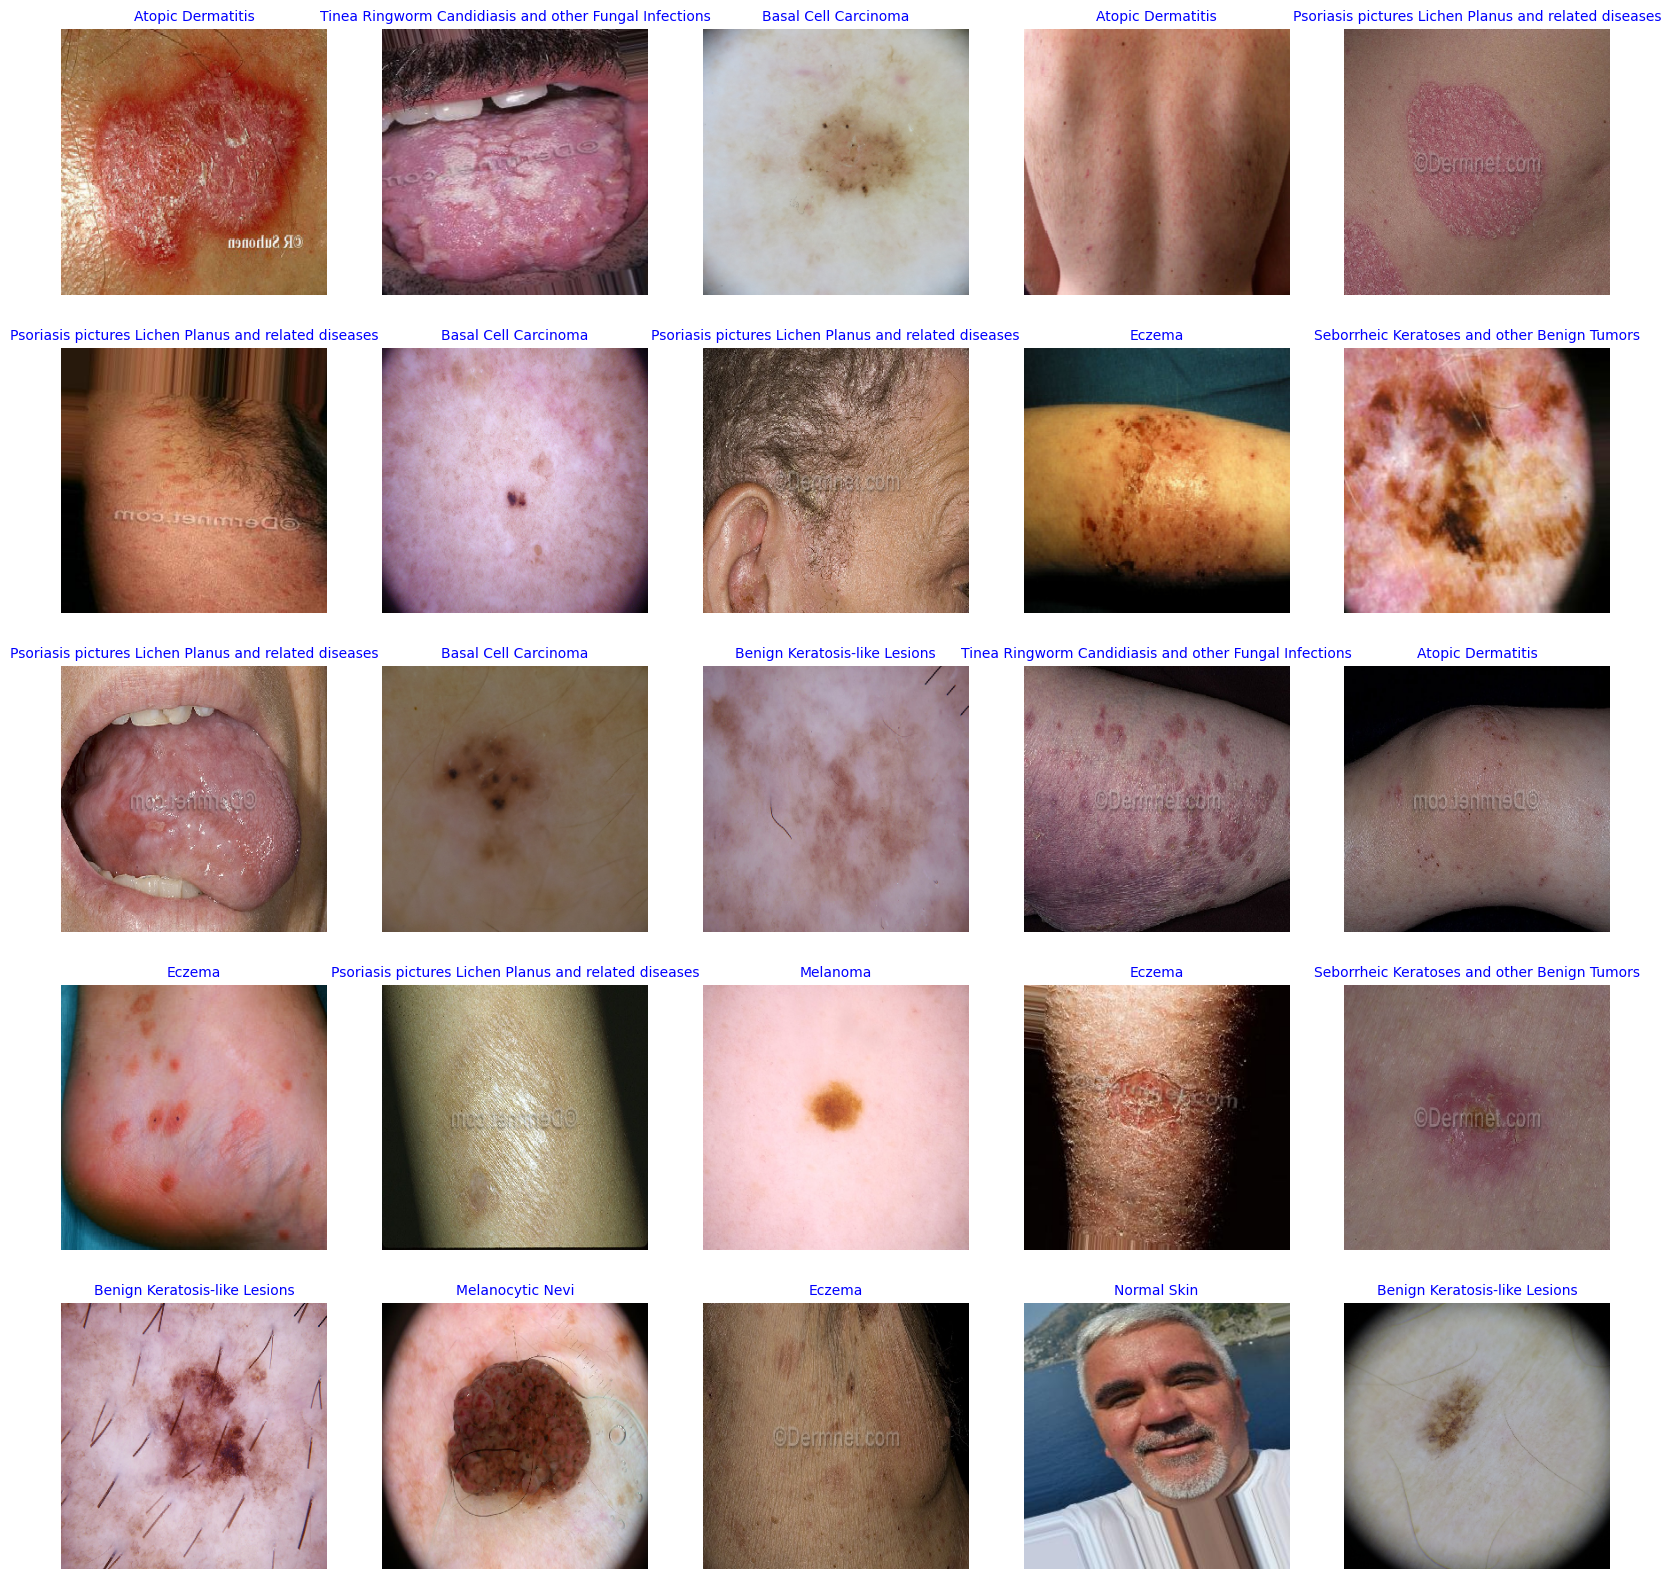

In [35]:
show_image_samples(train_gen)

<a id = '3.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal;background-color: maroon; color : #fed766; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" >3. Modeling</h2>
<br>

<div class = 'image'> <img style="float:center; width:60%; hight:60%; border:5px solid maroon;" align=center src = https://miro.medium.com/v2/resize:fit:678/1*u4hyohOF9SIRRLBAzqYXfQ.jpeg>
</div>
<br>
In the DensNet the first convolutional layer that receives input is the only layer in a standard feedforward convolutional neural network (CNN) that receives the output of the previous layer. This convolutional layer then creates an output feature map, which is passed to subsequent convolutional layers. For "L" layers, there is a direct "L" connection, one between layers and the next layer. However, the "vanishing gradient" problem arises when the CNN has more layers or goes deeper. This suggests that as the length of the information channel from the input layer to the output layer increases, some information may be "vanished" or lost, hampering the network's ability to train efficiently. I mean by modifying the typical CNN architecture and streamlining the connections between layers, DensNets alleviate this problem. Each layer of the DensNet architecture is directly connected to every other layer, hence the nickname Densely Connected Convolutional Network. The "L" layer has L(L+1)/2 direct connections. 

<a id = '3.1'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.1. BaseModel...</strong></p>

In [36]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization

model_name='DenseNet121'
base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(300, 300, 3)) 

29084464/29084464 [==============================] - 0s 0us/step


<a id = '3.2'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.2. Layers...</strong></p>

In [37]:
x= base_model.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

output=Dense(11,activation='softmax')(x) #FC-layer
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 306, 306, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 150, 150, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

<a id = '3.3'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.3. Callback and Fitting...</strong></p>

In [ ]:
epochs =100
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.95 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.75 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=100# number of epochs to run before asking if you want to halt training
batches=train_steps
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

history=model.fit(train_gen, epochs=epochs, verbose=0, callbacks=callbacks, validation_data = valid_gen,
               validation_steps=val_steps,  shuffle=False,  initial_epoch=0)

 initializing callback starting train with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration



<a id = '3.4'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.4. Plotting Error,Losses,and Accuracies...</strong></p>

In [ ]:
tr_plot(history,0)
subject='skin disease'
acc=model.evaluate( ubtest_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))

<a id = '3.5'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.5. Show Confusion Matrix and Classification Report...</strong></p>

In [ ]:
print_code=0
preds=model.predict(test_gen, steps=test_steps, verbose=1) 
print_info( test_gen, preds, print_code, working_dir, subject )  

In [ ]:
print_code=0
preds=model.predict(ubtest_gen, steps=test_steps, verbose=1) 
print_info( ubtest_gen, preds, print_code, working_dir, subject )  

<a id = '3.6'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.6. Convert model to TFlite...</strong></p>

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model-xception294,222.tflite', 'wb') as f:
    f.write(tflite_model)

<a id = '3.7'></a>
<p style = "font-size:25px; color : #fed766 ;background-color:; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> 3.7. Download The Model...</strong></p>

In [ ]:
import os
os.chdir(r'/kaggle/working')
from IPython.display import FileLink 
FileLink(r'model-xception294,222.tflite')

<a id = '4.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: maroon; color : #fed766; border-radius: 5px 5px; padding:5px; text-align:center; font-weight: bold" >4. Summary</h2>


<br>
<p style = "font-size:25px; color:#fed766 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> what happened so far?</strong></p>
<br>

On a very wide scale, skin is an incredible human structure. It commonly experienced both well-known and rare disorders. Dermatology, or more specifically, the diagnosis of human skin illnesses, is the most ambiguous and challenging discipline of science. It has been noted that the majority of cases go unreported due to a lack of improved medical infrastructure and equipment as well as the difficulty in visualizing the disease. A dermatologist will make a differential diagnosis to gather all the likely causes of any suspected disease and will perform exclusion procedures up until the condition is identified. 


This is where the concept for the project to create the first Android mobile application of its kind came from, which would assist any doctor or patient in performing a basic skin examination in order to identify diseases other than just skin cancer. With our work, we hope to reduce the time, money, and effort involved in online diagnosis, which has been increasingly popular, particularly after the COVID-19 pandemic. Additionally, the goal was to accurately detect various illnesses for the user.


The goal of the project is to increase the application's performance. Deep learning is used in this study to build an efficient model using the Dense Net technique; however, despite extensive testing with alternative algorithm architectures, Dense Net proved to be the most effective. In order to evaluate the effectiveness of the proposed system, the team also gathered diverse images as needed to run several tests on our dataset, which was obtained via Kaggle.

<br>
<p style = "font-size:25px; color:#fed766 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Special Thanks for Prof.Dr.Magdy Abd El-Azim and Dr.Wessam M.Salama for their encouragement to do a great job and to provide our group with useful information and recommendations on how to improve each time. Thank you for your ongoing support and nice communication, which has made us feel more engaged in what we're working on. We appreciate everything they have done for us 🤩❤️ </strong></p>
<br>

<br>
<p style = "font-size:25px; color:#fed766 ;background-color: maroon ; text-align: Center; border-radius: 5px 5px; padding: 5px" ><strong> Thanks for reading though all the way... we hope our work is helpful 🙏 </strong></p>
<br>
